# A report on a Financial Derivative (Avalanche) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [2]:
initial_data = yf.download("AVAX-USD", start="2020-11-28", end="2022-11-28")

[*********************100%***********************]  1 of 1 completed


## 2 Years Data of Avalanche 

In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-28,3.589427,3.697806,3.480224,3.624503,3.624503,17509244
2020-11-29,3.624608,3.767205,3.532624,3.704312,3.704312,3901221
2020-11-30,3.704346,3.813839,3.645647,3.686424,3.686424,21457284
2020-12-01,3.686461,3.816161,3.492484,3.579318,3.579318,24719236
2020-12-02,3.579347,3.842220,3.529019,3.731418,3.731418,5085526


In [4]:
initial_data['Adj Close'].head()

Date
2020-11-28    3.624503
2020-11-29    3.704312
2020-11-30    3.686424
2020-12-01    3.579318
2020-12-02    3.731418
Name: Adj Close, dtype: float64

In [5]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-11-28 to 2022-11-27
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [6]:
data.head()

Date
2020-11-28    3.624503
2020-11-29    3.704312
2020-11-30    3.686424
2020-12-01    3.579318
2020-12-02    3.731418
Name: Adj Close, dtype: float64

In [7]:
data.tail()

Date
2022-11-23    13.031652
2022-11-24    12.940833
2022-11-25    12.828289
2022-11-26    12.752357
2022-11-27    12.876786
Name: Adj Close, dtype: float64

### Line graph showing price movement of Avalanche in 2 years time frame

array([<AxesSubplot:xlabel='Date'>], dtype=object)

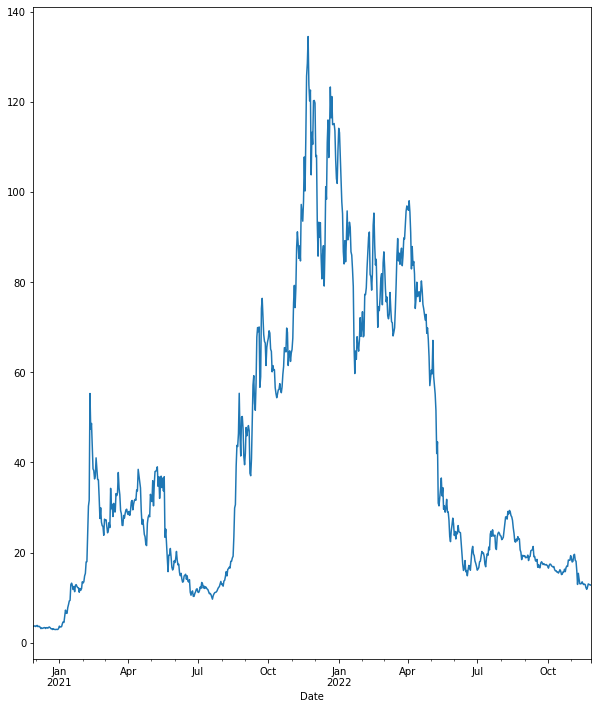

In [8]:
data.plot(figsize=(10, 12), subplots=True)

## Finding the Annualized Volatility 

In [9]:
data.head()

Date
2020-11-28    3.624503
2020-11-29    3.704312
2020-11-30    3.686424
2020-12-01    3.579318
2020-12-02    3.731418
Name: Adj Close, dtype: float64

In [10]:
data.tail()

Date
2022-11-23    13.031652
2022-11-24    12.940833
2022-11-25    12.828289
2022-11-26    12.752357
2022-11-27    12.876786
Name: Adj Close, dtype: float64

In [11]:
Ava = data[-92:-1]

In [12]:
log_return = np.log(Ava/Ava.shift(1))
log_return

Date
2022-08-28         NaN
2022-08-29    0.048641
2022-08-30   -0.000181
2022-08-31   -0.011289
2022-09-01    0.009284
                ...   
2022-11-22    0.040393
2022-11-23    0.055979
2022-11-24   -0.006994
2022-11-25   -0.008735
2022-11-26   -0.005937
Name: Adj Close, Length: 91, dtype: float64

In [13]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 91.12 %


In [14]:
Ava_MP = Ava[-1]     # Current Market price of Avalanche
Ava_MP

12.75235652923584

## Binomial Tree

In [15]:
S0 = Ava_MP             # spot crypto price
K = 15                  # strike
T = 0.25                # maturity 
r = 0.0375              # risk free rate (US)
sigma = vol             # diffusion coefficient or volatility
N = 51                  # number of periods or number of time steps 
payoff = "call"         # payoff 

In [16]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [17]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [18]:
S

array([[ 12.75235653,  13.59246738,  14.4879238 , ..., 290.58638506,
        309.72988814, 330.1345436 ],
       [  0.        ,  11.96417048,  12.75235653, ..., 255.77586114,
        272.62608619, 290.58638506],
       [  0.        ,   0.        ,  11.22469992, ..., 225.13543134,
        239.96709946, 255.77586114],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.55963598,
          0.59650417,   0.63580119],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.52504651,   0.55963598],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.49259491]])

In [19]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48549527120615177

## Finding the option value at each final node

In [20]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
V

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 315.1345436 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 275.58638506],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 240.77586114],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

## Finding European call option value

In [21]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[  1.57445186,   1.95739356,   2.41386397, ..., 275.59189875,
        294.73264524, 315.1345436 ],
       [  0.        ,   1.21366424,   1.52735984, ..., 240.78137483,
        257.62884329, 275.58638506],
       [  0.        ,   0.        ,   0.91808948, ..., 210.14094503,
        224.96985656, 240.77586114],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [22]:
print('European ' + payoff, str( V[0,0]))

European call 1.5744518582158114


## Monte Carlo simulation


In [23]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [24]:
T = 0.25
r = 0.0375
sigma = vol
S0 = Ava_MP
K = 15

In [25]:
S = mcs_simulation_np(1000)

In [26]:
S = np.transpose(S)
S

array([[12.75235653, 12.66284686, 12.49245115, ..., 23.51317494,
        23.50652954, 24.48895697],
       [12.75235653, 13.08940053, 13.13433908, ...,  8.92377556,
         8.86790699,  8.88508999],
       [12.75235653, 12.59848585, 12.86619031, ..., 10.54295565,
        10.26083883, 10.32858188],
       ...,
       [12.75235653, 12.47774397, 12.596801  , ...,  5.86660492,
         6.02278227,  6.0168913 ],
       [12.75235653, 12.86769972, 13.08200273, ..., 17.41774557,
        17.13495011, 17.60354302],
       [12.75235653, 12.95218721, 13.18707891, ..., 11.60705642,
        11.87218185, 11.86373187]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

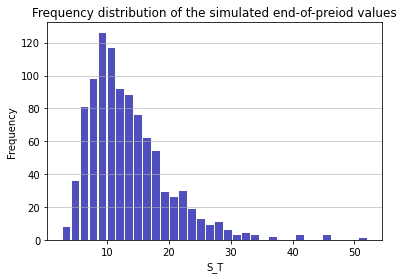

In [27]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [28]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 1.8060689181365546


# Option Greeks

## Value of option

In [29]:
def euro_option_bsm(S, K, T, r, vol, q, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #q: dividend yield; Here, there is on dividend so the value of q is 0.
    #payoff: call
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
   
    return option_value

In [30]:
q = 0

In [31]:
euro_option_bsm(Ava_MP, 15, 0.25, 0.0375, vol, q, 'call')

1.5703100312146772

In [32]:
S = np.linspace(5,30,51)
Call = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 15, 0.25, 0.0375, vol, q, 'call')

## Line graph showing relation between option price and crypto price

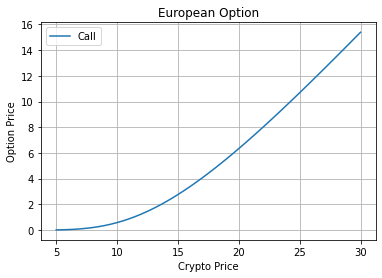

In [33]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call'])

## Delta

In [34]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    
    return delta


In [35]:
delta(Ava_MP, 15, 0.25, 0.0375, q, vol, 'call')

0.4570354093310564

In [36]:
S = np.linspace(5,25,51)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 15, 0.25, 0.0375, q, vol, 'call')

### Line graph of Delta

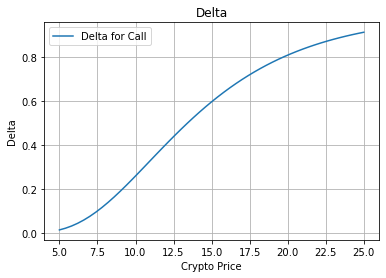

In [37]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [38]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    
    return delta


In [39]:
S = np.linspace(5,25,51)
T = np.linspace(0.25, 0.5, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 15, T[i], 0.0375, q, vol, 'call')

### 3D Model of Delta

C:\Users\Admin\AppData\Local\Temp\ipykernel_19916\743355234.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


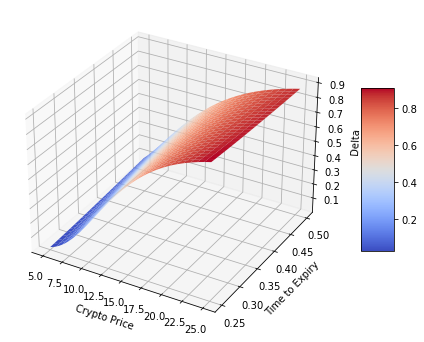

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [41]:
d = delta(Ava_MP, 15, 0.25, 0.0375, q, vol, 'call')
print('The value of Delta is', d.round(4),'.','If the Crypto price increase $1, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.457 . If the Crypto price increase $1, then the value of the option will increase $ 0.457 .


## Gamma

In [42]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [43]:
gamma(Ava_MP, 15, 0.25, 0.0375, 0, vol, 'call')

0.06826334989629386

In [44]:
S = np.linspace(5,25,51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 15, 0.25, 0.0375, q, vol, 'call')

### Line graph of Gamma

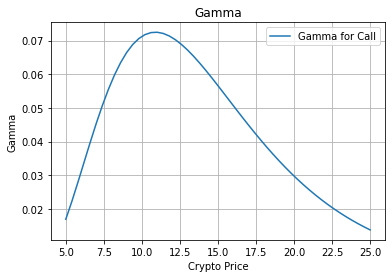

In [45]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [46]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [47]:
S = np.linspace(5, 25, 51)
T = np.linspace(0.25, 0.5, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 15, T[i], 0.0375, q, vol, 'call')

### 3D Model of Gamma

C:\Users\Admin\AppData\Local\Temp\ipykernel_19916\2487733431.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


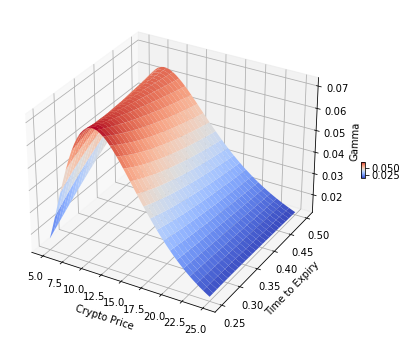

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.05, aspect=5);

In [78]:
g = gamma(Ava_MP, 15, 0.25, 0.0375, q, vol, 'call')
print('The value of Gamma is', g.round(4),'.','If the Spot price increase by $1, then the value of the delta will increase by', g.round(4), '.')

The value of Gamma is 0.0683 . If the Spot price increase by $1, then the value of the delta will increase by 0.0683 .


## Speed

In [50]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [51]:
speed(Ava_MP, 15, 0.25, 0.0375, q, vol, 'call')

-0.002042620602339936

In [52]:
S = np.linspace(5,25,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 15, 0.25, 0.0375, q, vol, 'call')

### Line graph of Speed

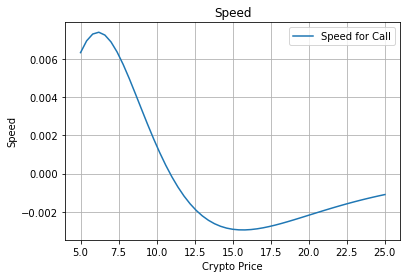

In [53]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

In [54]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [55]:
S = np.linspace(5, 25, 51)
T = np.linspace(0.25,0.5, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 15, T[i], 0.0375, q, vol, 'call')

### 3D Model of Speed

C:\Users\Admin\AppData\Local\Temp\ipykernel_19916\3084007888.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


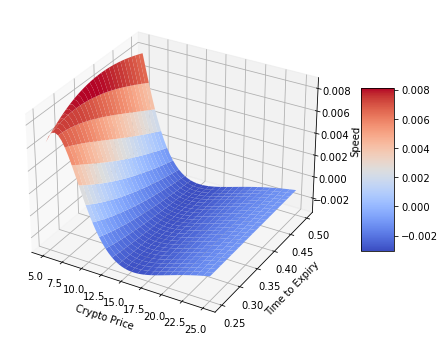

In [56]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [57]:
s = speed(Ava_MP, 15, 0.25, 0.0375, q, vol, 'call')
print('The value of speed is', s.round(4),'.','If the Crypto price increase $1, then the value of the gamma will decrease by', s.round(4), '.')

The value of speed is -0.002 . If the Crypto price increase $1, then the value of the gamma will decrease by -0.002 .


## Theta

In [58]:
def theta(S, K, T, r, vol, q, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta


In [59]:
theta(Ava_MP, 15, 0.25, 0.0375, 0.9112, q, 'call')

4.768438736209175

In [60]:
T = np.linspace(0.25,3,51)
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(Ava_MP, 15, T[i], 0.0375, vol, q, 'call')

### Line graph of Theta

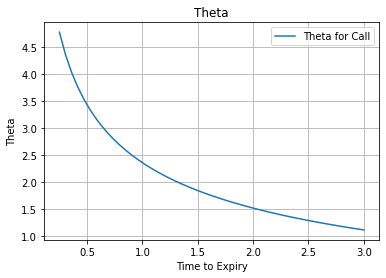

In [61]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [62]:
def theta(S, K, T, r, vol, q, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta

In [74]:
S = np.linspace(5, 30, 51)
T = np.linspace(0.25, 0.5, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 15, T[i], 0.0375, vol, q, 'call')

### 3D Model of Theta

C:\Users\Admin\AppData\Local\Temp\ipykernel_19916\2883061110.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


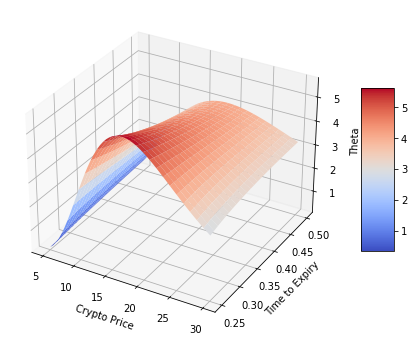

In [75]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [77]:
t = theta(Ava_MP, 15, 0.25, 0.0375, vol, q, 'call')
print('The value of theta is', t.round(4),'.','If the theta increases by 1 point, then the value of the option will increas by $1','.')

The value of theta is 4.7687 . If the theta increases by 1 point, then the value of the option will increas by $1 .


## Rho

In [66]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
   
    return rho


In [67]:
rho(Ava_MP, 15, T[i], 0.0375, q, vol, 'call')

array([2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861, 2.15574861, 2.15574861, 2.15574861, 2.15574861,
       2.15574861])

In [68]:
r = np.linspace(0,0.1,51)
Rho_Call = np.zeros((len(r),51))
for i in range(len(r)):
    Rho_Call [i] = rho(Ava_MP, 15, T[i], 0.0375, q, vol, 'call')

### Line graph of Rho

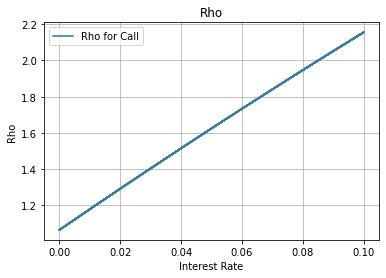

In [69]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [70]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
   
    return rho


In [71]:
S = np.linspace(5, 25, 51)
T = np.linspace(0.25, 0.5, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 15, T[i], 0.0375, q, vol, 'call')

### 3D Model of Rho

C:\Users\Admin\AppData\Local\Temp\ipykernel_19916\298383028.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


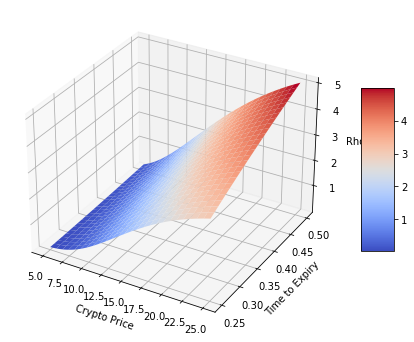

In [72]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [73]:
rh = rho(Ava_MP, 15, 0.25, 0.0375, q, vol, 'call')
print('The value of Rho is', rh.round(4),'.','If the interest rate rises by 1%, then the value of the option will increase $', rh.round(4), '.')

The value of Rho is 1.0645 . If the interest rate rises by 1%, then the value of the option will increase $ 1.0645 .
